In [99]:
import joblib
import pickle
import numpy as np
from utils.models import Classification
from utils.model_evaluation import performance_evaluate
from sklearn.preprocessing import StandardScaler

In [108]:
# Read Feature File
num = 5
file = f"feature_set_syn{num}_down_sample"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{file}.pickle"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)

In [107]:
display(dataset.keys())

dict_keys(['mean_input', 'POS_IDX', 'y_label'])

In [109]:
dataset["mean_input"].columns

Index(['REF', 'FILTER_Mutect2', 'FILTER_Freebayes', 'FILTER_Vardict',
       'FILTER_Varscan', 'm2_MQ', 'm2_FS', 'm2_MQ0', 'm2_MQRankSum', 'm2_NLOD',
       'f_MQMR', 'f_MQM', 'f_AB', 'f_ABP', 'f_MEANALT', 'f_ODDS', 'f_PAIRED',
       'f_PAIREDR', 'f_QR', 'f_RPP', 'vs_DP', 'vs_GPV', 'vs_SPV', 'vs_SSC',
       'vd_AF', 'vd_DP', 'vd_MSI', 'vd_SOR', 'vd_SSF', 'vd_VD'],
      dtype='object')

In [100]:
name = f"feature_set_real1"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{file}.pickle"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)

In [77]:
classifier = Classification()

## Decision Tree

In [101]:
params = {
    "max_depth": np.arange(2,5,1), # 
    "min_samples_split": np.arange(2,6,2)
}

In [102]:
# x_train, y_train = dataset["mode_input"].drop(columns= ["REF_MFVdVs","ALT_MFVdVs"]).to_numpy(), dataset["y_label"].to_numpy(),
# x_train, y_train = dataset["median_input"].drop(columns= ["REF"]).to_numpy(), dataset["median_label"].to_numpy()
x_train, y_train = dataset["mean_input"].drop(columns= ["REF"]).to_numpy(), dataset["y_label"].to_numpy()

tuner, best_params, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="decision_tree"
)

# Save file
model_name = f"syn{num}_mean_down_sample_dt"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 13:14:20.938482


KeyboardInterrupt: 

In [87]:
x_train, y_train = dataset["mean_input"].drop(columns= ["REF"]).to_numpy(), dataset["y_label"].to_numpy()


 Macro Precision :  0.97, Recall :  0.97, F1 :  0.97
 Micro Precision :  0.97, Recall :  0.97, F1 :  0.97
 binary Precision :  0.97, Recall :  0.98, F1 :  0.97


((0.9695659629193012, 0.966710182767624, 0.9680834492695218),
 (0.9694516971279373, 0.9694516971279373, 0.9694516971279373),
 (0.9690322580645161, 0.9804177545691906, 0.9746917585983128))

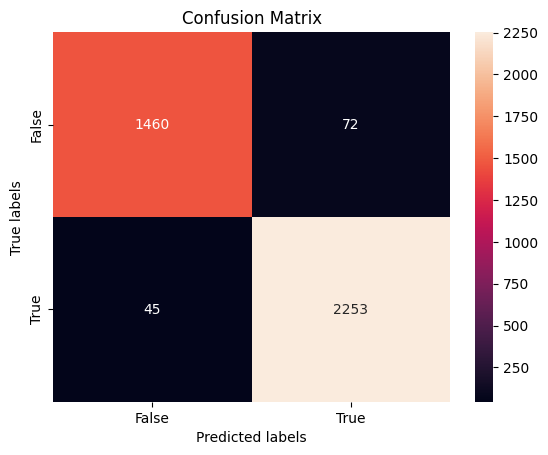

In [103]:
num = 5
model_name = f"syn{num}_mean_down_sample_dt"

performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


In [105]:
x_train

array([[True, False, True, ..., 100.0, 0.05461, 4.0],
       [True, True, False, ..., 95.37191087119187, 0.12107607161945483,
        4.433458043826831],
       [True, False, True, ..., 100.0, 0.05575, 4.0],
       ...,
       [True, False, False, ..., 1.0, 0.58224, 14.0],
       [True, False, False, ..., 95.37191087119187, 0.12107607161945483,
        4.433458043826831],
       [True, False, False, ..., 95.37191087119187, 0.12107607161945483,
        4.433458043826831]], dtype=object)

## Random Forest

In [48]:
params = {
    "max_depth": np.arange(2,5,1), # 
    "min_samples_split": np.arange(2,6,2),
    "min_samples_leaf": np.arange(4,10,2)
}

In [49]:
x_train, y_train = dataset["median_input"].drop(columns= ["REF"]).to_numpy(), dataset["median_label"].to_numpy(),

tuner, best_params, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="random_forest"
)

# Save file
model_name = "real1_median_SMOTE_rf"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 10:44:53.912054


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.

Model Tuning Completed :: 2024-02-20 10:45:40.938204


['/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/real1_median_SMOTE_rf.joblib']

 Macro Precision :  0.98, Recall :  0.97, F1 :  0.98
 Micro Precision :  0.98, Recall :  0.98, F1 :  0.98
 binary Precision :  0.99, Recall :  0.94, F1 :  0.96


((0.9825248240281097, 0.9688469633034187, 0.9753796489089677),
 (0.9801825642245481, 0.9801825642245481, 0.9801825642245481),
 (0.9876751922342805, 0.9423977521073993, 0.964505392091599))

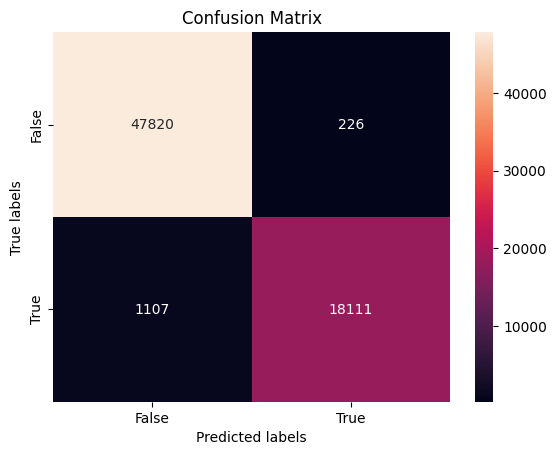

In [50]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


# SVM

In [25]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy().ravel()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [27]:
params = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="svc"
)

# Save file
model_name = "real1_mean_impute_svc"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 08:57:47.633259


KeyboardInterrupt: 

In [ ]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


# KNN Classifier

In [6]:
params = { 'n_neighbors' : [1,2, 5, 7],
        'weights' : ['uniform','distance'],
        'metric' : ['euclidean','manhattan']}

In [7]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy().ravel(),

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="knn"
)

# Save file
model_name = "real1_mean_impute_knn"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 09:16:42.204164


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module i

Model Tuning Completed :: 2024-02-20 09:18:47.551519


ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


# Niave Bayes Classifier